## Visualization

In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(magrittr); library(zeallot); library(glue); library(tidyverse); library(glue); library(lubridate)
    library(scales);library(reshape2); library(RColorBrewer);
})

### Editors

In [2]:
file <- "metrics/metrics.tsv"
contributor <- read.csv(file,sep = '\t')
contributor$month <- as.Date(contributor$month, format = "%Y-%m-%d")

In [3]:
tail(contributor)

,month,active_editors,anonymous_edits,global_south_active_editors,global_south_edits,global_south_new_editor_retention,global_south_nonbot_edits,mobile.heavy_wiki_active_editors,mobile.heavy_wiki_edits,mobile.heavy_wiki_new_editor_retention,⋯,net_new_content_pages,new_active_editors,new_editor_retention,non_anonymous_edits,other_nonbot_edits,returning_active_editors,revert_rate,total_edits,uploads,wikidata_edits
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
242,2021-01-01,100206,2385157,24975,2679282,0.05227910,2470191,5788,1534365,0.05589870,⋯,1903989,21351,0.06184561,43805900,14502673,78855,0.05483805,46193370,890467,19363111
243,2021-02-01,94098,2189441,22961,2624628,0.05346039,2349968,5223,1323602,0.05811178,⋯,2190708,18716,0.06481851,44033180,4883772,75382,0.05404508,46224091,946127,20299650
244,2021-03-01,100345,2320935,24869,2748858,0.05303831,2591609,5707,1212874,0.05555555,⋯,3144609,20669,0.07396418,48937350,5690055,79676,0.05573311,51259653,1970348,21041855
245,2021-04-01,97125,2178544,24252,3450291,0.05165874,2604520,5465,1240569,NA,⋯,2590341,18830,0.07339128,41700698,4772515,78295,0.05146558,43880912,1761754,17784086
246,2021-05-01,98730,2294554,25308,3414303,0.05619000,2700943,5560,1226707,NA,⋯,2227436,19876,0.07375079,47328592,5280862,78854,0.05327524,49624611,1270095,20602931
247,2021-06-01,91670,2089434,24610,3122716,0.05716456,2530074,5103,963573,0.06134969,⋯,1739466,17723,0.06602384,40073089,5218602,73947,0.05565716,42163576,796256,18875684


In [4]:
editors_fy <- contributor %>% 
     select(month,active_editors,new_active_editors,returning_active_editors) %>%
     filter(month >= '2018-07-01') %>%
     mutate(fiscal_year = ifelse(month >= '2018-07-01' & month < '2019-07-01', 'FY 2018/19', ifelse(month <'2018-07-01','FY 2017/18',ifelse(month <'2020-07-01','FY 2019/20','FY 2020/21'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

editors_fy$MonthN = factor(editors_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

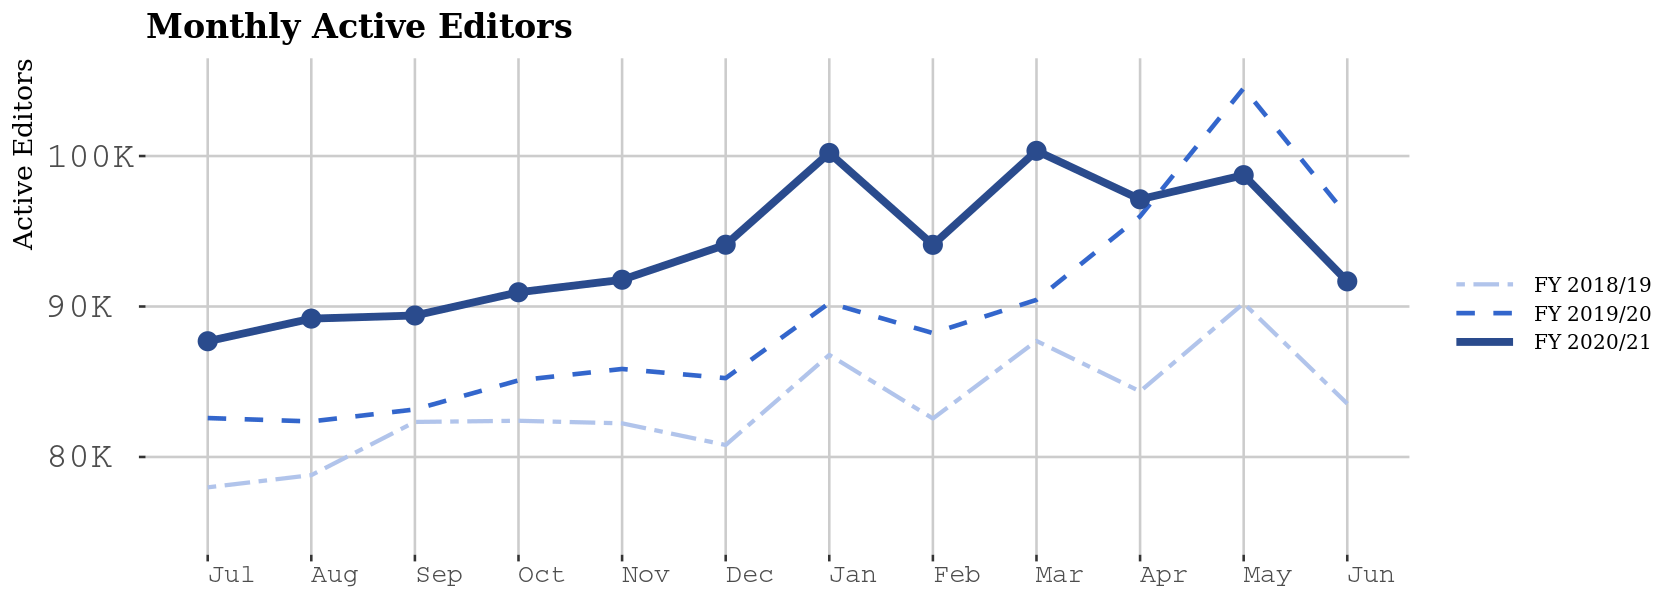

In [5]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- 
    ggplot(editors_fy,aes(x = MonthN,y = active_editors, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=editors_fy[(editors_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=active_editors, group=fiscal_year, color = fiscal_year),size = 5,color ="#2a4b8d")+
    scale_size_manual(values = c(1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2018/19" = "#b1c4eb", "FY 2019/20" = "#3366cc","FY 2020/21" = "#2a4b8d")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = editors_fy$MonthN, labels = editors_fy$Month) +
    scale_y_continuous("Active Editors", labels = polloi::compress,limits = c(75E3, 105E3)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 16,family="Courier"),
           axis.text.y=element_text( hjust = 0,size = 22,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Active Editors") 

p1


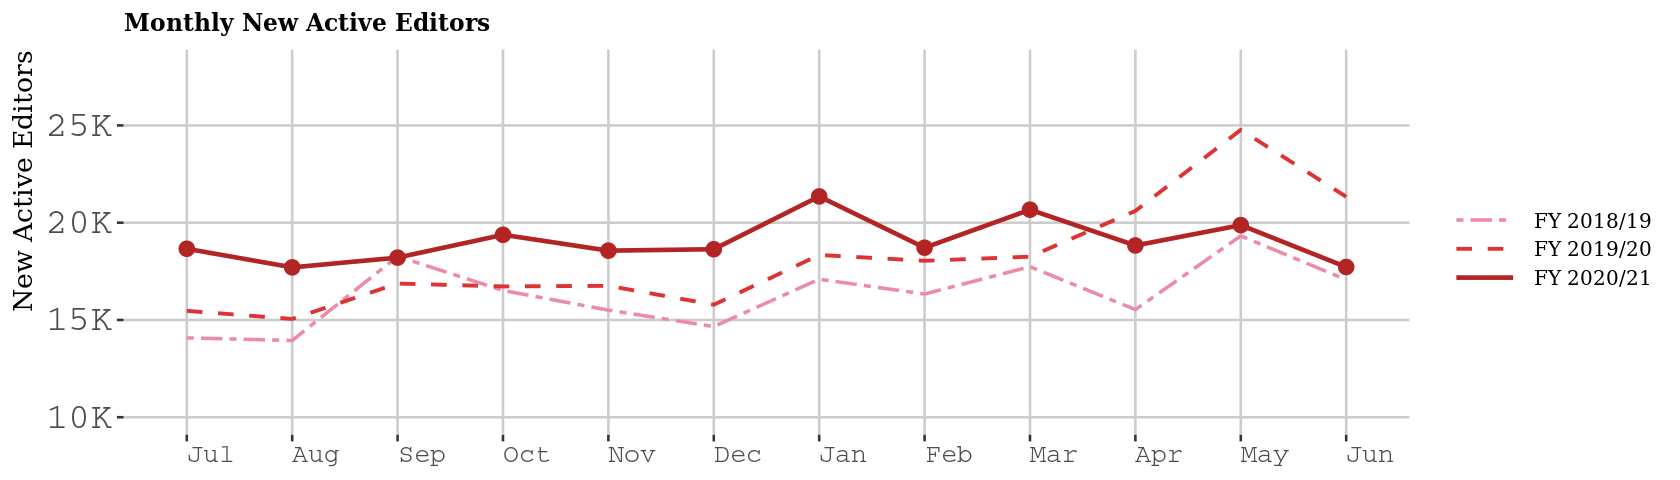

In [6]:
options(repr.plot.width = 14, repr.plot.height = 4)

p2 <- ggplot(editors_fy,aes(x = MonthN,y = new_active_editors, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=editors_fy[(editors_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=new_active_editors, group=fiscal_year, color = fiscal_year),size = 4,color='#b32424')+

    scale_size_manual(values = c(1,1.1,1.3,2)) +
    scale_color_manual(values = c("FY 2018/19" = "#ec8ba7", "FY 2019/20" = "#dd3333","FY 2020/21" = "#b32424")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete("Month",
                      breaks = editors_fy$MonthN, 
                     labels = editors_fy$Month) +
    scale_y_continuous("New Active Editors",labels = polloi::compress,limits = c(10E3, 28E3)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.title.x=element_blank(),
          axis.text.x=element_text( hjust = 0,size = 16,family="Courier"),
           axis.text.y=element_text( hjust = 0,size = 22,family="Courier"),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 14,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly New Active Editors") 

p2

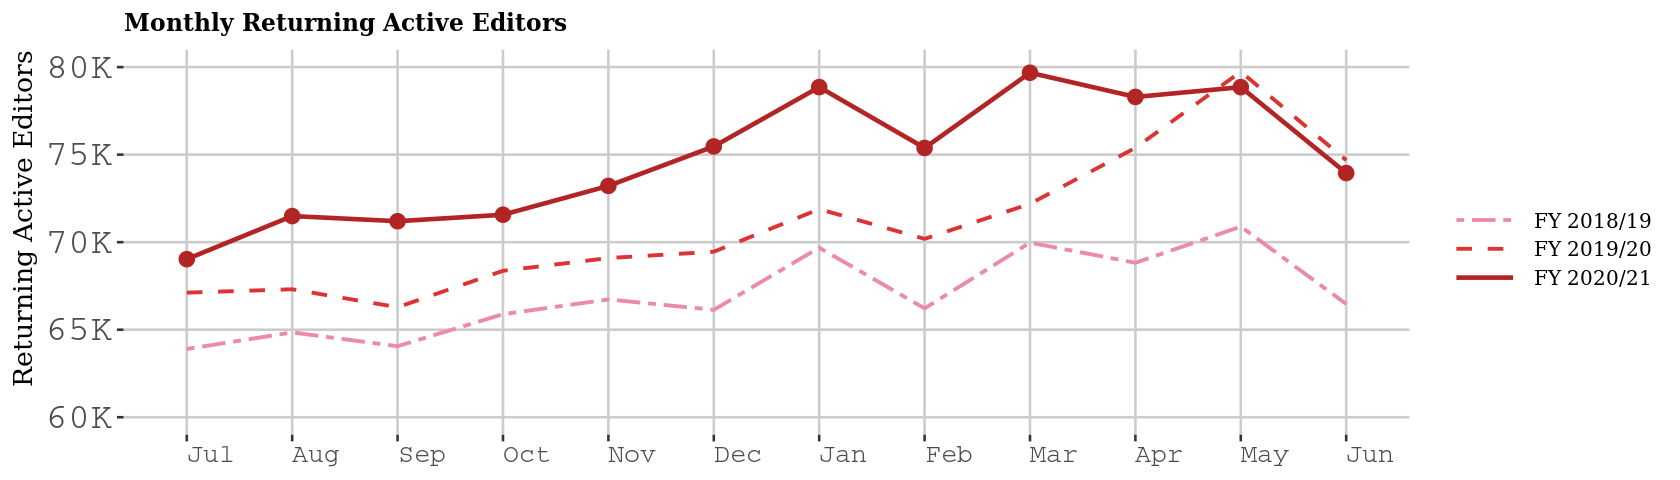

In [7]:
options(repr.plot.width = 14, repr.plot.height = 4)

p3 <- ggplot(editors_fy,aes(x = MonthN,y = returning_active_editors, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=editors_fy[(editors_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=returning_active_editors, group=fiscal_year, color = fiscal_year),size = 4,color='#b32424')+
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +
    scale_color_manual(values = c("FY 2018/19" = "#ec8ba7", "FY 2019/20" = "#dd3333","FY 2020/21" = "#b32424")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete("Month",breaks = editors_fy$MonthN, labels = editors_fy$Month) +
    scale_y_continuous("Returning Active Editors", labels = polloi::compress,limits = c(60E3,80E3)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
     theme(axis.title.x=element_blank(),
           axis.text.x=element_text( hjust = 0,size = 16,family="Courier"),
           axis.text.y=element_text( hjust = 0,size = 22,family="Courier"),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 14,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
           legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Returning Active Editors")

p3

### Net new Content

In [8]:
content_fy <- contributor %>% 
     select(month,net_new_content_pages,net_new_Commons_content_pages,net_new_Wikidata_entities,net_new_Wikipedia_articles) %>%
     mutate(without_wikidata = net_new_content_pages - net_new_Wikidata_entities ) %>%
     filter(month >= '2018-07-01') %>%
    # filter(month < '2019-07-01') %>%
     mutate(fiscal_year = ifelse(month >= '2018-07-01' & month < '2019-07-01', 'FY 2018/19', ifelse(month <'2018-07-01','FY 2017/18',ifelse(month <'2020-07-01','FY 2019/20','FY 2020/21'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

content_fy$MonthN = factor(content_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))

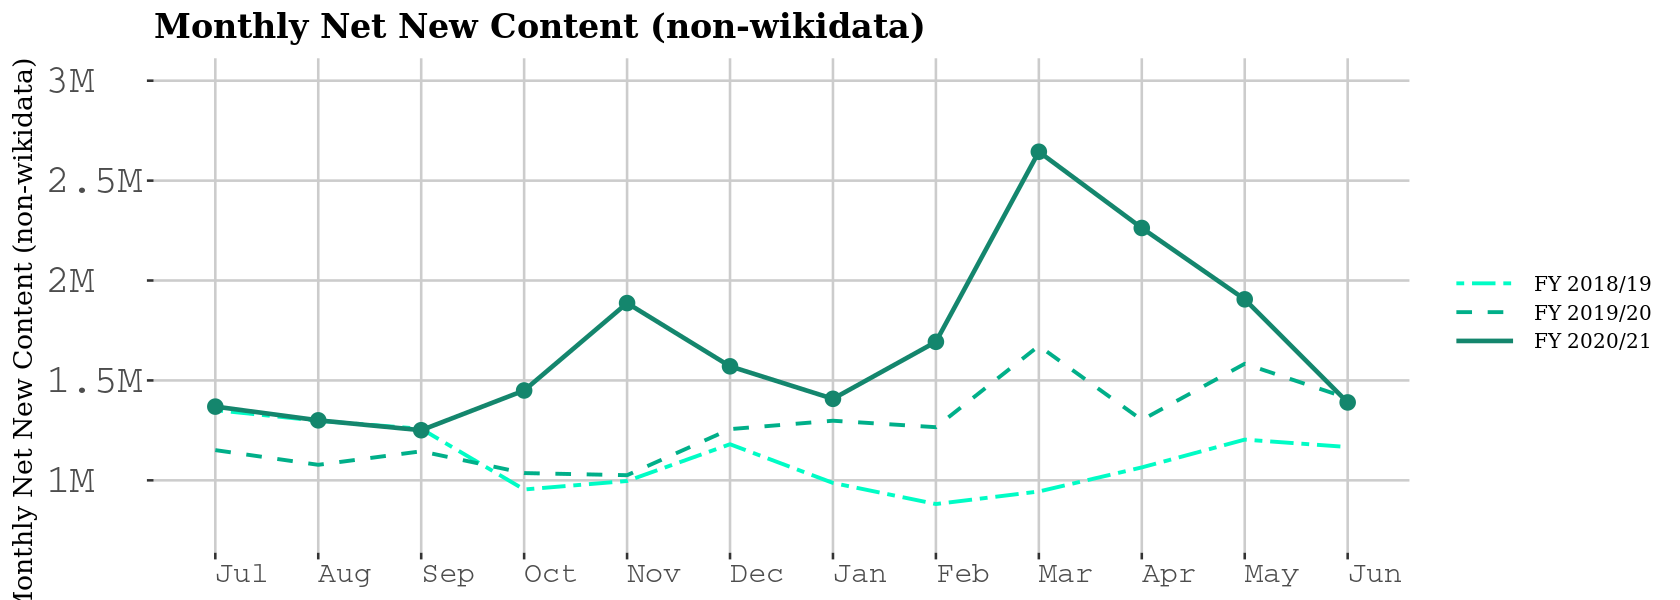

In [9]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <-
    ggplot(content_fy,aes(x = MonthN,y = without_wikidata, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=content_fy[(content_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=without_wikidata, group=fiscal_year, color = fiscal_year),size = 4,color='#14866d')+
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +

    scale_color_manual(values = c("FY 2018/19" = "#00fcc5", "FY 2019/20" = "#00af89","FY 2020/21" = "#14866d")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = content_fy$MonthN, labels = content_fy$Month) +
    scale_y_continuous("Monthly Net New Content (non-wikidata)", labels = polloi::compress,limits = c(75E4, 300E4)) +

    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Net New Content (non-wikidata)") 

p1

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



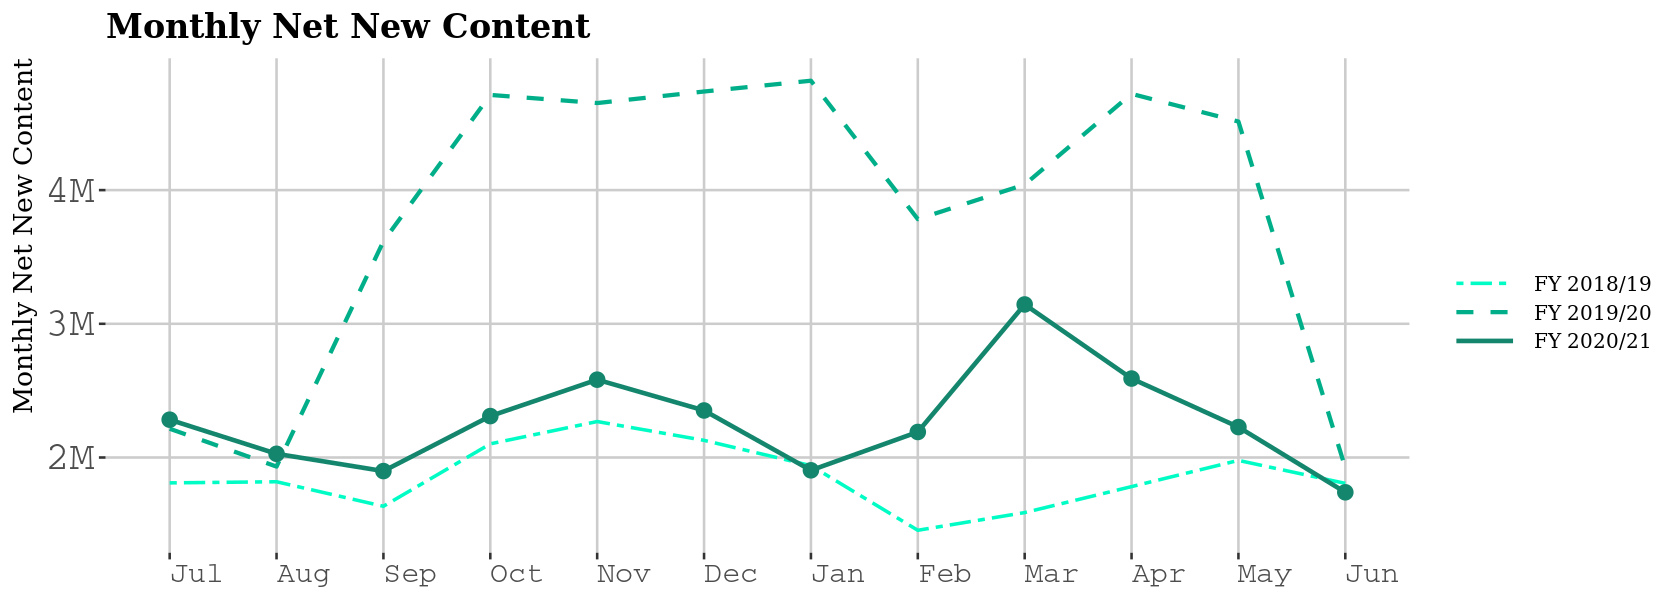

In [10]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- 
    ggplot(content_fy,aes(x = MonthN,y = net_new_content_pages, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=content_fy[(content_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=net_new_content_pages, group=fiscal_year, color = fiscal_year),size = 4,color='#14866d')+
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +

    scale_size_manual(values = c(1,1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2018/19" = "#00fcc5", "FY 2019/20" = "#00af89","FY 2020/21" = "#14866d")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = content_fy$MonthN, labels = content_fy$Month) +
    scale_y_continuous("Monthly Net New Content", labels = polloi::compress) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Net New Content") 

p1

Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



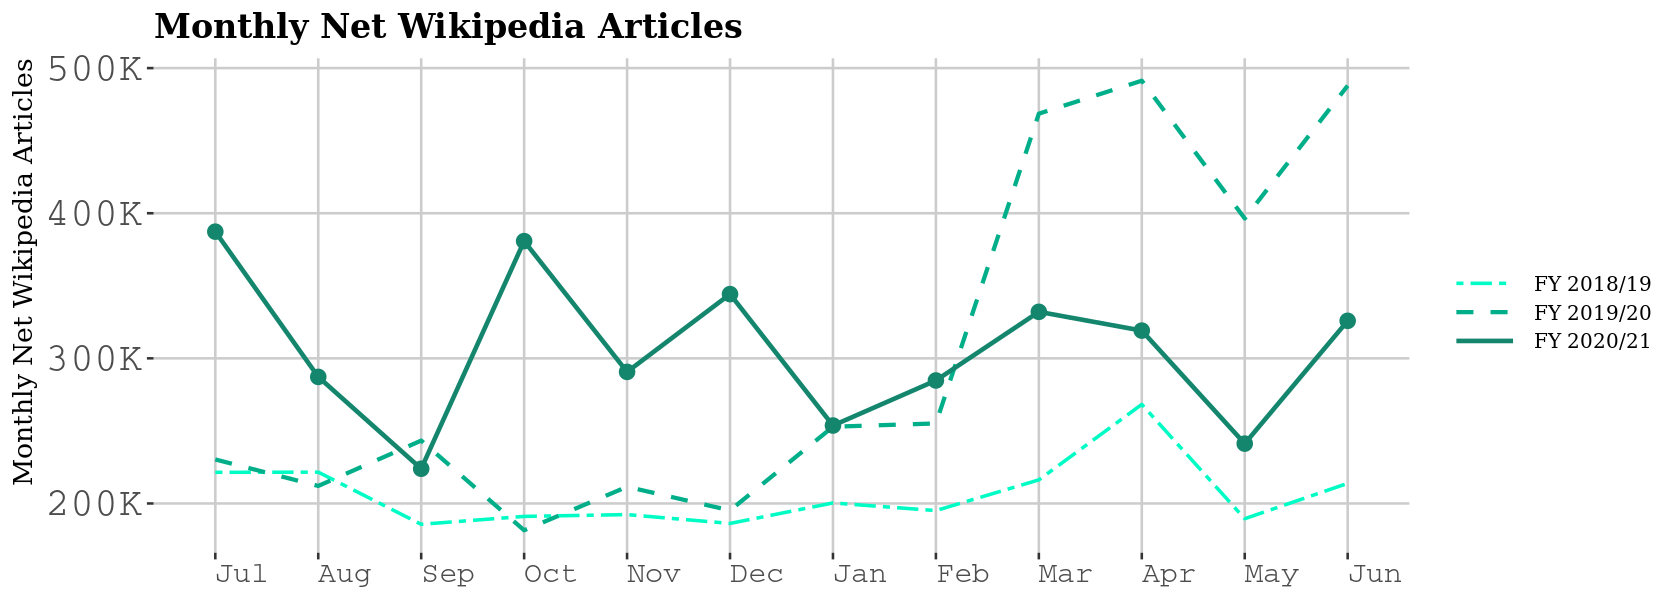

In [11]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- 
    ggplot(content_fy,aes(x = MonthN,y = net_new_Wikipedia_articles, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=content_fy[(content_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=net_new_Wikipedia_articles, group=fiscal_year, color = fiscal_year),size = 4,color='#14866d')+
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +
    scale_size_manual(values = c(1,1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2018/19" = "#00fcc5", "FY 2019/20" = "#00af89","FY 2020/21" = "#14866d")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = content_fy$MonthN, labels = content_fy$Month) +
    scale_y_continuous("Monthly Net Wikipedia Articles", labels = polloi::compress) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Net Wikipedia Articles") 

p1


Scale for 'size' is already present. Adding another scale for 'size', which
will replace the existing scale.



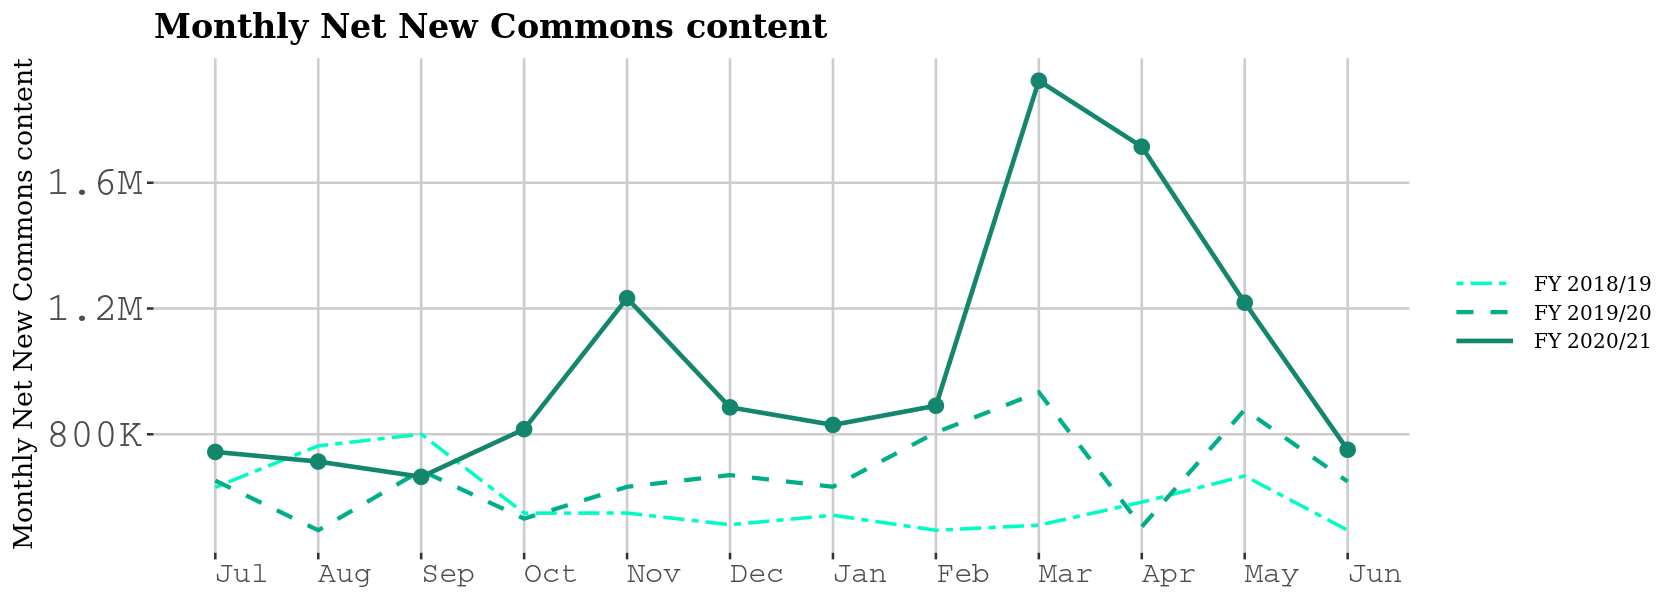

In [12]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- 

    ggplot(content_fy,aes(x = MonthN,y = net_new_Commons_content_pages, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=content_fy[(content_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=net_new_Commons_content_pages, group=fiscal_year, color = fiscal_year),size = 4,color='#14866d')+
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +
    scale_size_manual(values = c(1,1.2,1.3,2.2)) +
    scale_color_manual(values = c("FY 2018/19" = "#00fcc5", "FY 2019/20" = "#00af89","FY 2020/21" = "#14866d")) +
    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = content_fy$MonthN, labels = content_fy$Month) +
    scale_y_continuous("Monthly Net New Commons content", labels = polloi::compress) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Net New Commons content") 

p1


In [13]:
retention_fy <- contributor %>% 
     select(month,new_editor_retention) %>%
      filter(month >= '2018-07-01') %>%
      mutate(fiscal_year = ifelse(month >= '2018-07-01' & month < '2019-07-01', 'FY 2018/19', ifelse(month <'2018-07-01','FY 2017/18',ifelse(month <'2020-07-01','FY 2019/20','FY 2020/21'))),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

retention_fy$MonthN = factor(retention_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))



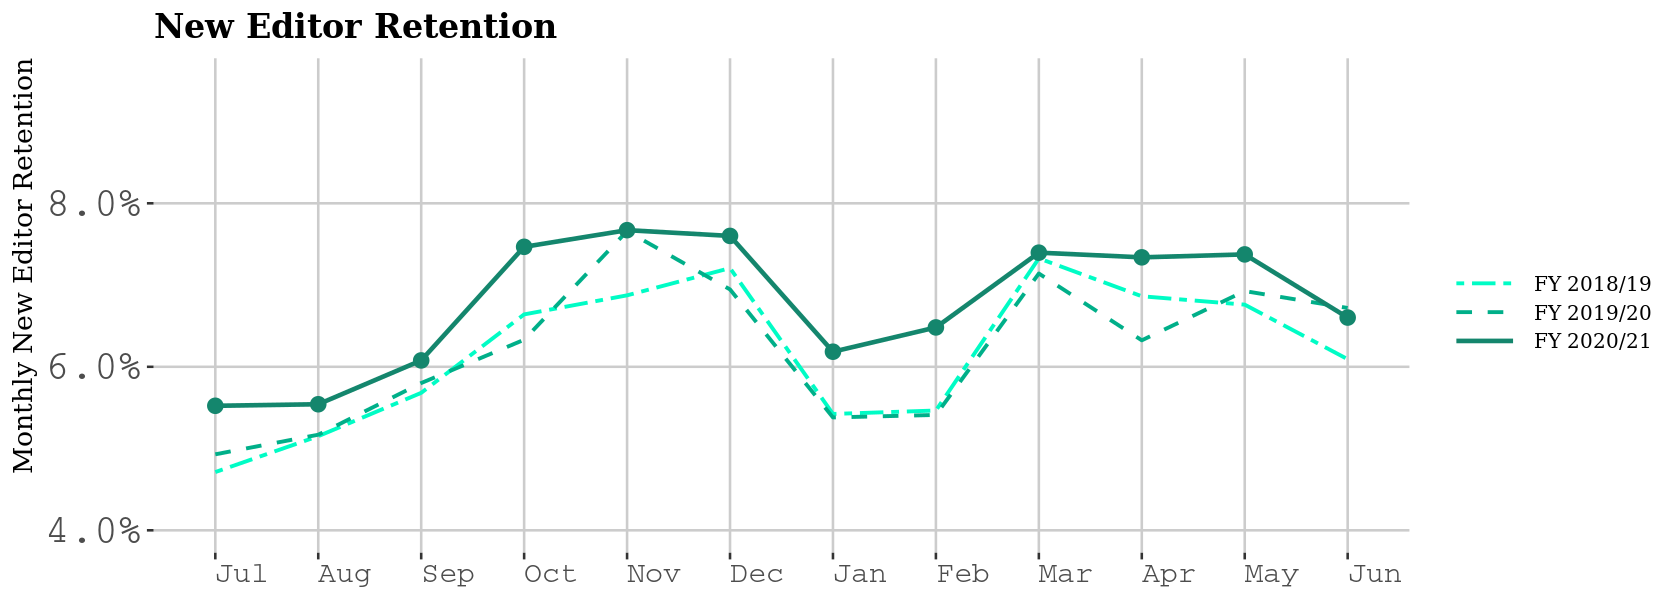

In [14]:

options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- ggplot(retention_fy,aes(x = MonthN,y = new_editor_retention, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year))+
    geom_line() +
    geom_point(data=retention_fy[(retention_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=new_editor_retention, group=fiscal_year, color = fiscal_year),size = 4,color='#14866d')+
    scale_size_manual(values = c(1.1,1.1,1.3,2)) +
    scale_color_manual(values = c("FY 2018/19" = "#00fcc5", "FY 2019/20" = "#00af89","FY 2020/21" = "#14866d")) +

    scale_linetype_manual(values=c("twodash", "dashed","solid")) +
    scale_x_discrete(breaks = retention_fy$MonthN, labels = retention_fy$Month) +
    scale_y_continuous("Monthly New Editor Retention", labels = scales::percent,limits = c(0.04, 0.095)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "New Editor Retention") 

p1

## Anoy edits testing

In [15]:
anoy_fy <- contributor %>% 
     select(month,anonymous_edits,non_anonymous_edits) %>%
     filter(month >= '2019-07-01') %>%
     melt(id.var = "month", measure.vars = c("anonymous_edits", "non_anonymous_edits") ) %>%
     mutate(fiscal_year = ifelse(month <'2020-07-01','FY 2019/20','FY 2020/21'),
           MonthN =as.factor(format(as.Date(month),"%m")),
         Month = months(as.Date(month), abbreviate=TRUE))

anoy_fy$MonthN = factor(anoy_fy$MonthN, levels=c("07","08", "09", "10", "11", "12", "01", "02", "03", "04", "05", "06"))


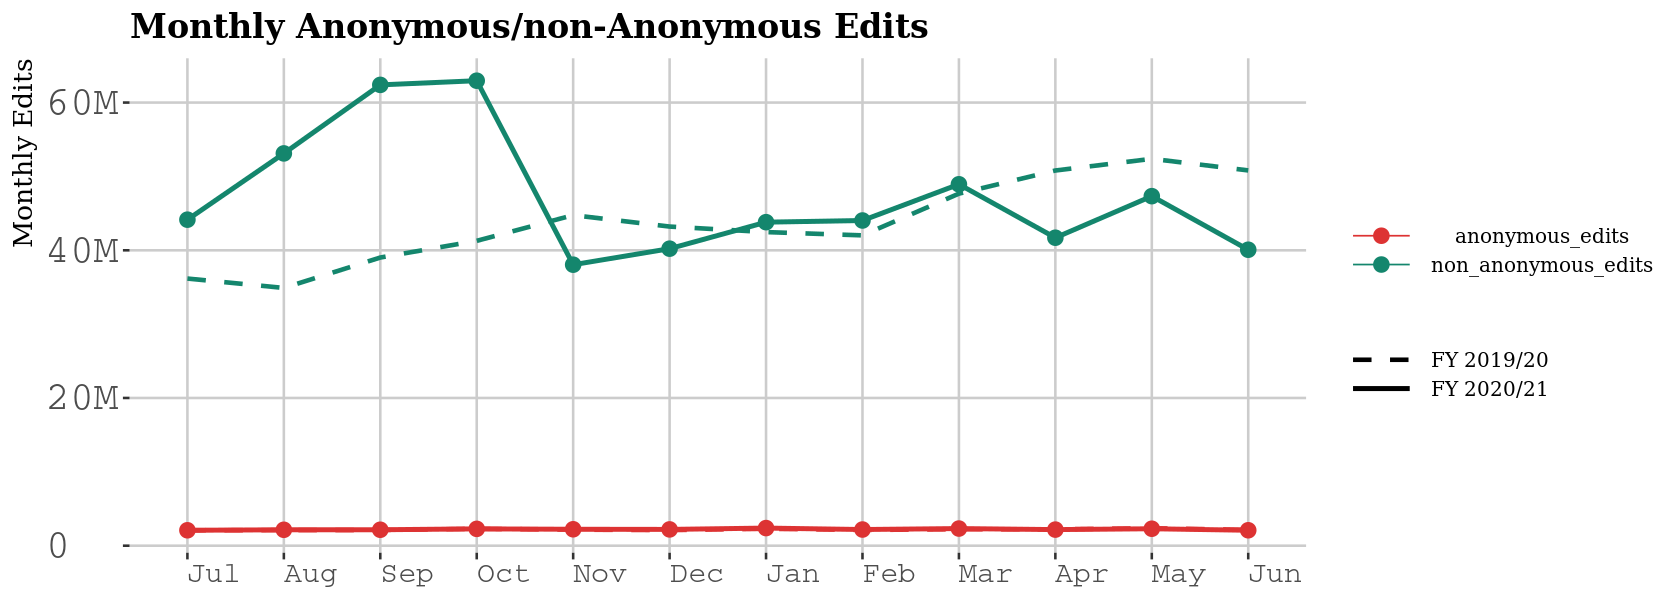

In [16]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- ggplot(anoy_fy,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = value, group=interaction(fiscal_year,variable), color = variable,size=fiscal_year,linetype = fiscal_year)) +
    scale_size_manual(values = c(1.3,1.4)) +
    geom_point(data=anoy_fy[(anoy_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=value, group=interaction(fiscal_year,variable), color = variable),size = 4)+
    scale_color_manual(values = c( "anonymous_edits" = "#dd3333","non_anonymous_edits" = "#14866d")) +
    scale_linetype_manual(values=c( "dashed","solid")) +
    scale_x_discrete(breaks =anoy_fy$MonthN, labels = anoy_fy$Month) +
    scale_y_continuous("Monthly Edits", labels = polloi::compress) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Anonymous/non-Anonymous Edits") 

p1

In [17]:
anoy_fy_t <- anoy_fy %>% filter(variable=='anonymous_edits')
anoy_fy_f <- anoy_fy %>% filter(variable=='non_anonymous_edits')

Warning message:
“Removed 12 rows containing missing values (geom_point).”


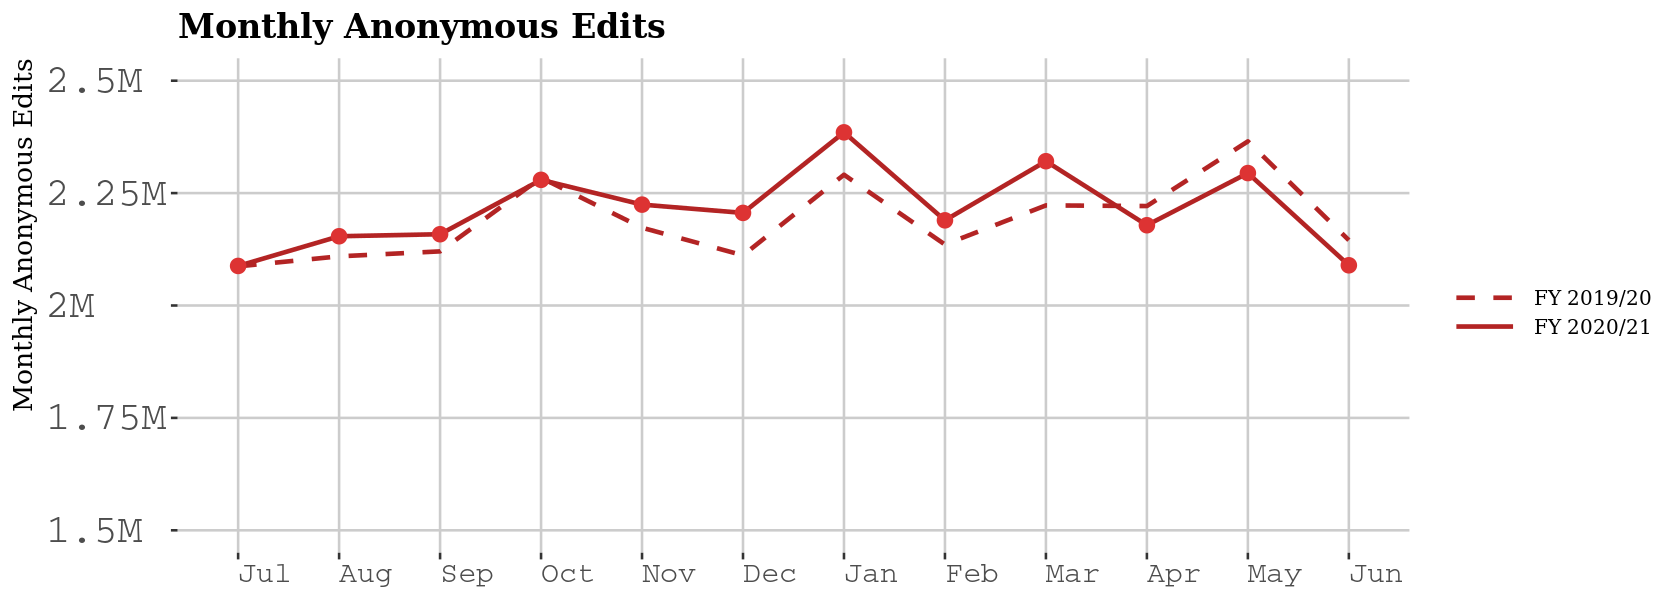

In [18]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- ggplot(anoy_fy_t,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = value, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    geom_point(data=anoy_fy[(anoy_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=value, group=interaction(fiscal_year,variable)),size = 4,colour="#dd3333")+
    scale_size_manual(values = c(1.3,1.3)) +
    scale_color_manual(values = c("FY 2019/20" = "#b32424","FY 2020/21" = "#b32424")) +
    scale_linetype_manual(values=c("dashed","solid","solid")) +
    scale_x_discrete(breaks = anoy_fy_t$MonthN, labels = anoy_fy_t$Month) +
    scale_y_continuous("Monthly Anonymous Edits", labels = polloi::compress,limits = c(1.5E6, 2.5E6)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly Anonymous Edits") 

p1

Warning message:
“Removed 12 rows containing missing values (geom_point).”


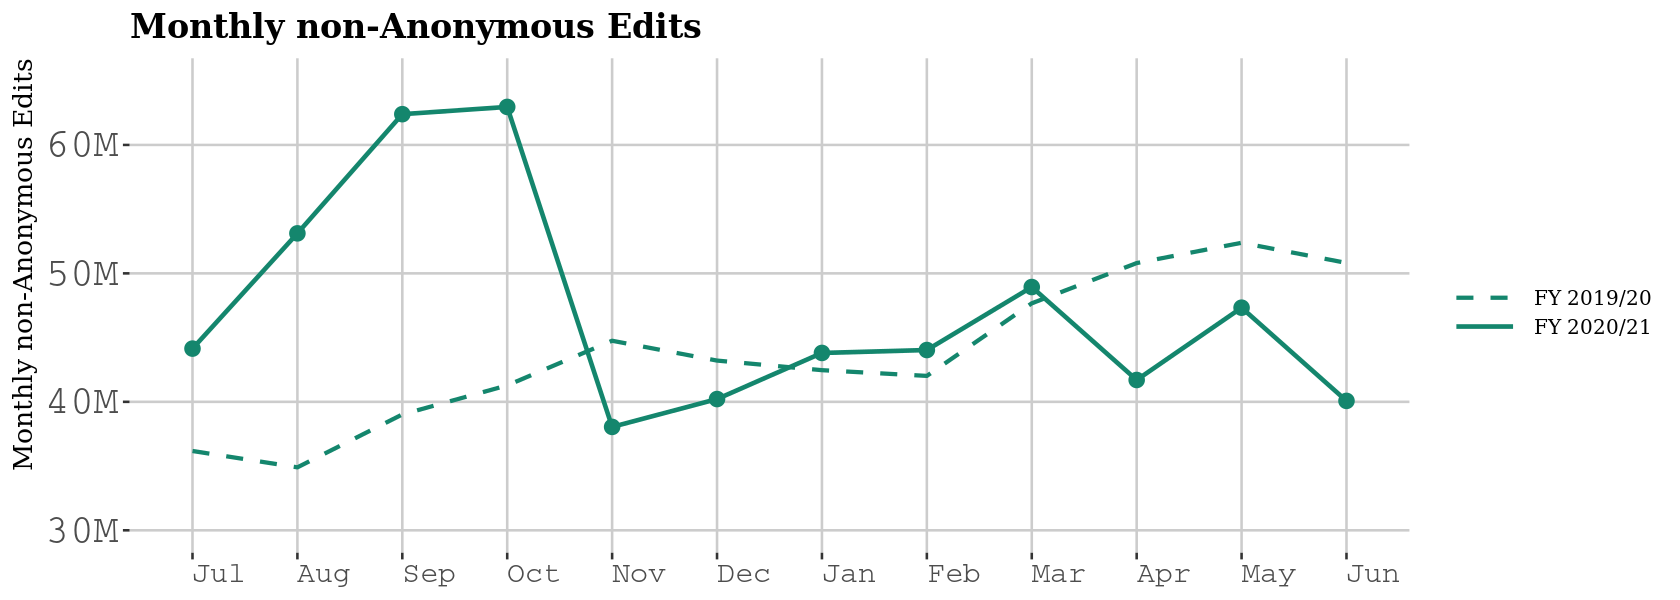

In [19]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- ggplot(anoy_fy_f,aes(x = MonthN)) +
    geom_line(aes(x = MonthN, y = value, group=fiscal_year, color = fiscal_year,size=fiscal_year,linetype = fiscal_year)) +
    geom_point(data=anoy_fy[(anoy_fy$fiscal_year =="FY 2020/21"),],aes(x=MonthN, y=value, group=interaction(fiscal_year,variable)),size = 4,colour="#14866d")+
    scale_size_manual(values = c(1.2,1.3)) +
    scale_color_manual(values = c("FY 2019/20" = "#14866d","FY 2020/21" = "#14866d")) +
    scale_linetype_manual(values=c("dashed","solid")) +
    scale_x_discrete(breaks = anoy_fy_f$MonthN, labels = anoy_fy_f$Month) +
    scale_y_continuous("Monthly non-Anonymous Edits", labels = polloi::compress,limits = c(3E7, 6.5E7)) +
    ggthemes::theme_tufte(base_size = 16,base_family = "serif") +
    theme(axis.text.x=element_text( hjust = 0,size = 18,family="Courier"),
          axis.text.y=element_text( hjust = 0,size = 24,family="Courier"),
          axis.title.x=element_blank(),
          panel.grid = element_line("gray80"),
          plot.title = element_text(size = 20,hjust = 0,face= "bold"),
          axis.title=element_text(size=16,hjust = 1),
          legend.title = element_blank(),
          legend.text =element_text( hjust = 0.5,size = 12),
          legend.key.width=unit(1.5,"cm"),
          panel.grid.minor.y = element_blank()) +
    labs(title = "Monthly non-Anonymous Edits") 

p1